# Airline Customer Satisfaction Prediction Using Random Forest

## Introduction

In today's competitive aviation industry, understanding customer satisfaction is essential for improving service quality and retaining loyal passengers. This project aims to develop a predictive model (using Invistico_Airline data obtained from Kaggle) that determines whether a customer is satisfied or not based on various factors such as in-flight services, seat comfort, flight delays, and more.

To achieve this, we will use the **Random Forest** algorithm — a powerful ensemble learning method known for its high accuracy, robustness to overfitting, and ability to handle complex, non-linear relationships between features. Random Forest is particularly well-suited for this task as it provides feature importance scores and handles both numerical and categorical variables effectively.

## Objectives

- Explore and clean the airline customer satisfaction dataset.
- Perform feature engineering and transformation.
- Train a **Random Forest** classifier to predict customer satisfaction.
- Evaluate model performance using appropriate classification metrics such as **accuracy**, **precision**, **recall**, and **F1-score**.
- Conduct Model Improvement

## Dataset Description

The dataset contains information collected from airline passengers, including:

- **Demographic information** (age, gender)  
- **Flight-related data** (travel class, flight distance, departure and arrival delays)  
- **In-flight service ratings** (food and drink, cleanliness, seat comfort, online services)  
- **Target variable**: `satisfaction` (Satisfied or Dissatisfied)


### 1.Libraries and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import joblib

In [2]:
# loading the dataset
df = pd.read_csv('C:/Users/user/Desktop/Sand Technologies Data Science Grad applic/Invistico_Airline/Invistico_Airline.csv')

### 2. Exploratory Data Analysis (EDA) & Data Transformation

Before building our Random Forest model, we begin by exploring and preparing the dataset. This process includes understanding the structure of the data, handling missing values, checking feature correlation using a heatmap, evaluating class imbalance, encoding categorical variables, and preparing the target variable.

### 2.1 Initial Dataset Exploration

We start by inspecting the first few rows using `.head()` to get an overview of the dataset. This helps us understand the nature of the features and what kind of data we're working with.

Next, we use `.dtypes` to check the **data types** of each column. This reveals which features are numerical and which are categorical — essential information for proper preprocessing. 

We also use `.isnull().sum()` to identify any **missing values** across the dataset that need to be handled before model training.


In [3]:
# Check the first few rows of the dataset
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
#Check the data types of the columns
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [5]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### 2.2 Handling Missing Data

We discover that the feature **'Arrival Delay in Minutes'** contains missing values. Since this is a numerical variable and likely skewed, we fill missing values using the **median**, which is more robust to outliers than the mean:

In [6]:
# Fill missing values in 'Arrival Delay in Minutes' with median
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

### 2.3 Target Variable Transformation

The target column, `satisfaction`, is categorical with labels such as *"Dissatisfied"* and *"Satisfied"*. We apply **label encoding** to convert this target column into a binary numeric form.


In [7]:
# Label encode the target column
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])

### 2.4 Encoding Categorical Features

Next, we identify other categorical features in the dataset such as `gender`, `customer type`, `travel class` and transform them using **one-hot encoding**. This approach creates binary columns for each category, allowing the model to process them numerically.


In [8]:
# Categorical columns to one-hot encode
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# One-hot encode and join with the original dataset (drop original columns)
df_encoded = pd.get_dummies(df, columns=categorical_cols,drop_first = True)


df_encoded = df_encoded.astype(int)

# Check your dataset
df_encoded.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0,0,0,1,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305,1,0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0,0,0,1,1,0
3,1,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0,0,0,1,1,0
4,1,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0,0,0,1,1,0


### 2.5 Correlation & Class Distribution

To better understand relationships between numerical features, we visualize a **correlation heatmap**. This helps us detect multicollinearity and explore which features are positively or negatively associated.

At the same time, we check for **class imbalance** in the target variable using a **bar chart**. This tells us whether the dataset is balanced or biased toward one `satisfaction` class, which could influence model performance.


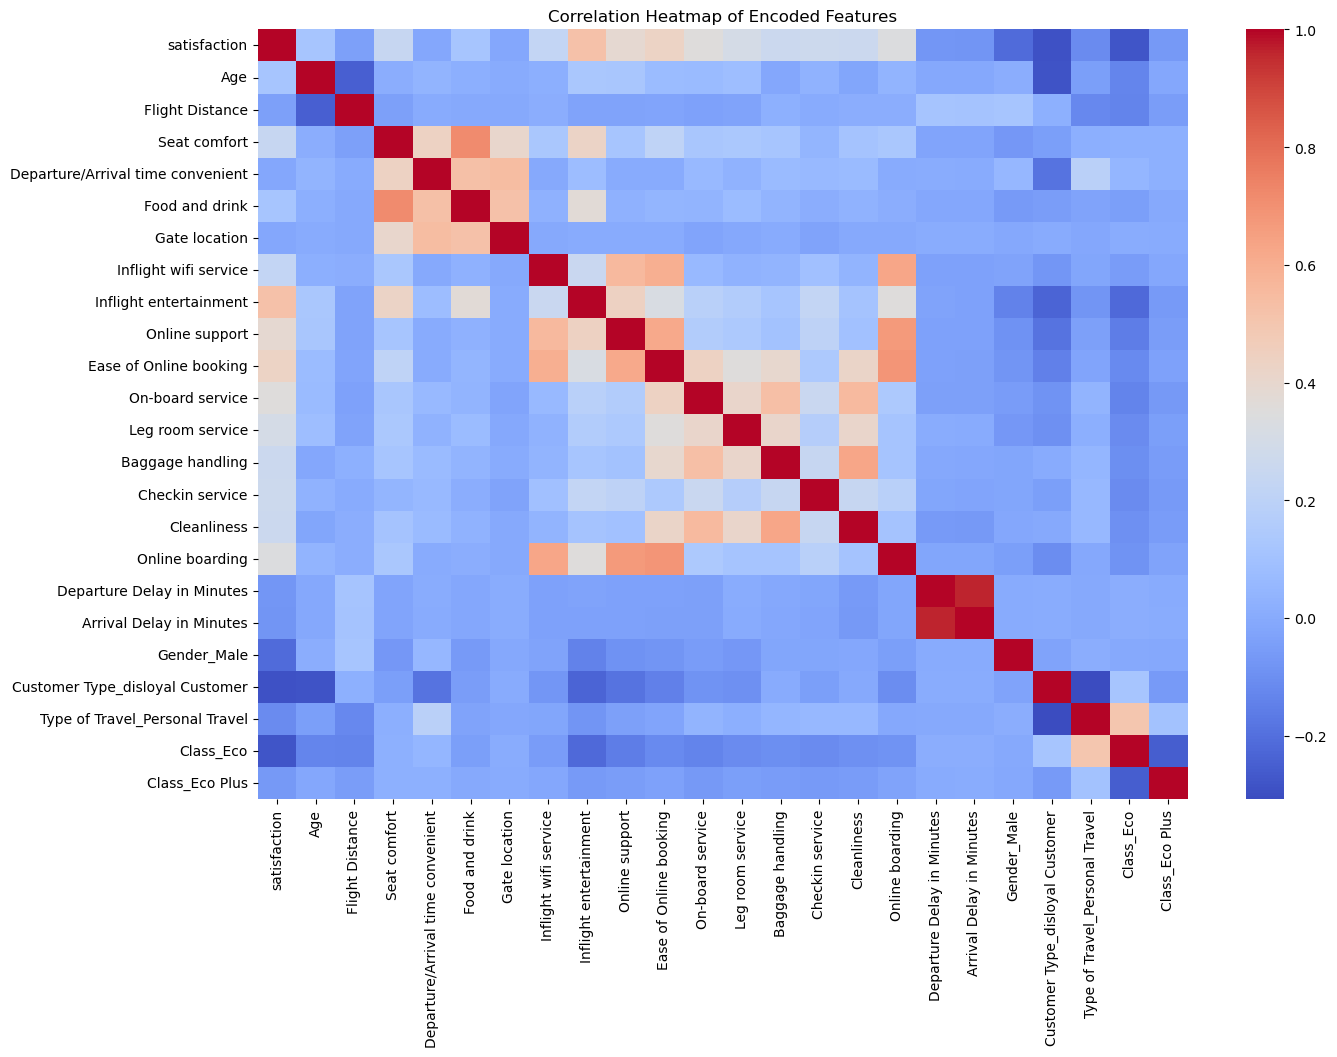

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Encoded Features")
plt.show()

In [10]:
import pandas as pd
import numpy as np

# Compute absolute correlation matrix
corr_matrix = df_encoded.corr().abs()

# Select only the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_triangle = corr_matrix.where(upper_triangle_mask)

# Unstack, drop NaNs, and sort by correlation value
corr_pairs = (
    upper_triangle
    .unstack()
    .dropna()
    .sort_values(ascending=False)
)

# Select top 5 most highly correlated feature pairs
top_5_pairs = corr_pairs.head(5)

print("Top 5 highly correlated feature pairs:")
print(top_5_pairs)



Top 5 highly correlated feature pairs:
Arrival Delay in Minutes  Departure Delay in Minutes    0.959382
Food and drink            Seat comfort                  0.715997
Online boarding           Ease of Online booking        0.684320
                          Online support                0.669843
Cleanliness               Baggage handling              0.631803
dtype: float64


The heatmap and subsequent computation of top 5 highly correlated features indicate that Arrival delay and depature delay are highly correlated. This can affect the perfomance of the model. There is also a significant correlation between food and drink and seat comfort.

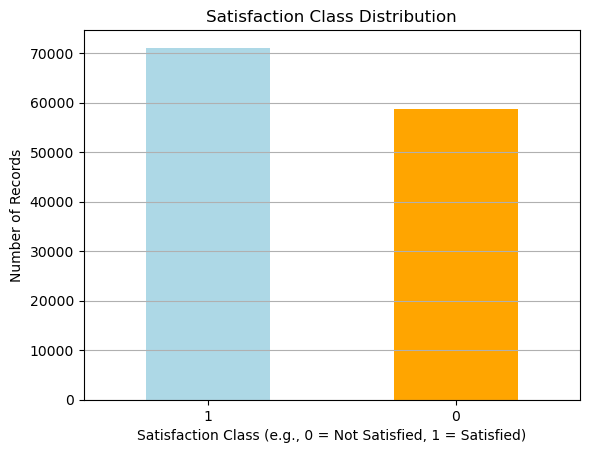

In [11]:
import matplotlib.pyplot as plt

# Plot class distribution
df_encoded['satisfaction'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])

plt.title('Satisfaction Class Distribution')
plt.xlabel('Satisfaction Class (e.g., 0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


The above visual shows that the classes are fairly balanced. Therefore we do not need to worry about the problem of class imbalance 

## 3. Preparing Data and Training the Random Forest model
### 3.1 Separating Input Features and Target
First, we split the encoded DataFrame into **features (`X`)** and **target (`y`)**:

In [12]:
# Separate input features and target
X = df_encoded.drop('satisfaction', axis=1)
y = df_encoded['satisfaction']

### 3.2 Train–Test Split (Stratified)

To ensure that both training and testing sets maintain the same proportion of satisfied vs. dissatisfied customers, we use a **stratified split**:

In [13]:
# Use stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### 3.3 Feature Scaling with StandardScaler

To ensure features are of the same scale, We standardize our numerical features using **`StandardScaler`**:

In [14]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 3.4 Training the Random Forest Model

After scaling our features, we initialize and train the random forest classifier:

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### 3.5 Prediction and Model Evaluation

After training the Random Forest model, we evaluate its performance on the test set:

In [16]:
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Confusion Matrix:
 [[11318   441]
 [  657 13560]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     11759
           1       0.97      0.95      0.96     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


Accuracy: 0.96



## 4. Interpretation

- **True Negatives (TN): 11318** — These are dissatisfied customers correctly predicted as dissatisfied.
- **False Positives (FP): 441** — These are dissatisfied customers incorrectly predicted as satisfied.
- **False Negatives (FN): 657** — These are satisfied customers incorrectly predicted as dissatisfied.
- **True Positives (TP): 13560** — These are satisfied customers correctly predicted as satisfied.

#### Classification Report:
| Metric     | Class 0 (Dissatisfied) | Class 1 (Satisfied) |
|------------|------------------------|----------------------|
| Precision  | 0.95                   | 0.97                 |
| Recall     | 0.96                   | 0.95                 |
| F1-score   | 0.95                   | 0.96                 |


- **Precision**: The model is 95–97% accurate when it predicts a customer as satisfied or dissatisfied.
- **Recall**: The model correctly identifies 95–96% of each class, showing strong ability to detect true labels.
- **F1-score**: Balanced metric between precision and recall is also high, showing overall strong performance.

#### Overall Accuracy: **96%**

This means that 96% of the time, the model correctly predicts whether a customer is satisfied or not. Such high performance suggests that the model generalizes well to unseen data and is effective for practical use in customer satisfaction prediction.


### Next Steps
We need to improve the model just to ensure the following;
- Minimizing false negatives (missing satisfied customers) to ensure we don’t overlook happy customers
- Minimizing false positives (mislabeling dissatisfied customers as satisfied) to avoid overestimating perceived service quality.



## 5. Model Improvement with RandomizedSearchCV

To improve the performance of our Random Forest classifier, we apply **hyperparameter tuning** using `RandomizedSearchCV`. This technique allows us to search across a specified range of hyperparameters more efficiently than a full grid search by randomly sampling a defined number of combinations.

### 5.1 Data Preparation
   - We split the data into training and testing sets using `train_test_split`, preserving class proportions using the `stratify` parameter.
   - We scale the feature values using `StandardScaler`, which improves performance and convergence for many models.

### 5.2 Model Definition
   - We initialize a `RandomForestClassifier` with `class_weight='balanced'` to handle potential class imbalance by adjusting weights inversely proportional to class frequencies.

### 5.3 Hyperparameter Grid
   - A narrower hyperparameter search space is defined to speed up the tuning process:
     - `n_estimators`: Number of trees in the forest.
     - `max_depth`: Maximum depth of each tree.
     - `min_samples_split`: Minimum number of samples required to split an internal node.
     - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
     - `max_features`: Number of features to consider when looking for the best split (using `'sqrt'` or `'log2'`).

### 5.4 RandomizedSearchCV
   - We use `RandomizedSearchCV` with:
     - `n_iter=10`: Only 10 combinations of hyperparameters will be tried.
     - `cv=3`: 3-fold cross-validation is used (faster than the typical 5-fold).
     - `n_jobs=-1`: Utilizes all available processors.
     - `scoring='accuracy'`: Evaluates combinations based on accuracy.
   - This process finds the best-performing combination without exhaustively searching all possible combinations.

### 5.5 Model Fitting and Evaluation
   - The best model is used to make predictions on the test set.
   - We evaluate the model using:
     - **Confusion Matrix**
     - **Classification Report** (Precision, Recall, F1-score)
     - **Accuracy Score**

NB: Kindly note that this code takes about 2 minutes to run

In [17]:
from sklearn.model_selection import RandomizedSearchCV


# Prepare data
X = df_encoded.drop('satisfaction', axis=1)
y = df_encoded['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Narrower hyperparameter grid for faster search
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # 'auto' removed due to deprecation warning
}

# Randomized search (optimized for speed)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,               # Fewer iterations
    scoring='accuracy',
    cv=3,                    # Fewer cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train_scaled, y_train)

# Results
print("Best hyperparameters:", random_search.best_params_)

# Predict and evaluate
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Confusion Matrix:
 [[11321   438]
 [  652 13565]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     11759
           1       0.97      0.95      0.96     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


Accuracy: 0.96


### Key Insight:

Although the overall accuracy remains unchanged at 96%, the number of misclassifications (False Positives and False Negatives) slightly decreased.

The tuned model is slightly more confident and consistent in distinguishing between satisfied and dissatisfied passengers, thanks to optimized tree depth and feature splitting strategy.

Most importantly, the model was trained more efficiently and intelligently, reducing computational time while maintaining high performance.
